In [14]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [17]:
# Load dataset
df = pd.read_csv("emotion_sentimen_dataset.csv")
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [18]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'@\w+', '', str(text))  
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r"\d+", "", text)  
    text = text.translate(str.maketrans("", "", string.punctuation))  
    return text.lower().strip()

df["clean_text"] = df["text"].apply(clean_text)
df.head()


,Unnamed: 0,text,Emotion,clean_text
0,0,i seriously hate one subject to death but now ...,hate,i seriously hate one subject to death but now ...
1,1,im so full of life i feel appalled,neutral,im so full of life i feel appalled
2,2,i sit here to write i start to dig out my feel...,neutral,i sit here to write i start to dig out my feel...
3,3,ive been really angry with r and i feel like a...,anger,ive been really angry with r and i feel like a...
4,4,i feel suspicious if there is no one outside l...,neutral,i feel suspicious if there is no one outside l...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790743 entries, 0 to 839554
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  790743 non-null  int64 
 1   text        790743 non-null  object
 2   Emotion     790743 non-null  object
 3   clean_text  790743 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.2+ MB


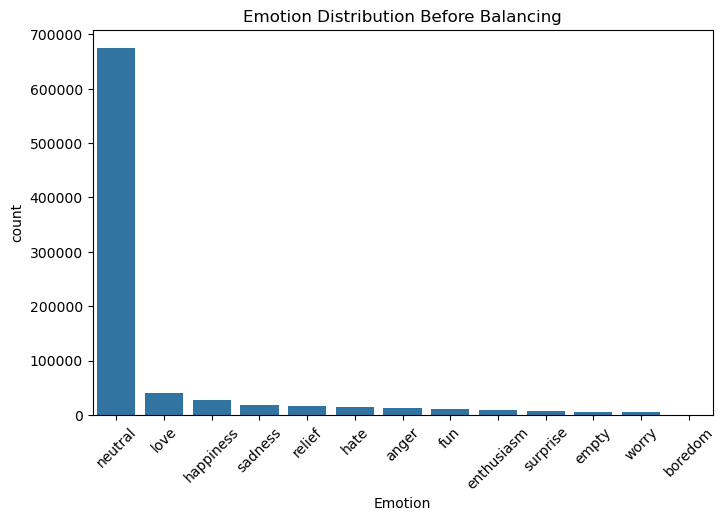

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Emotion", order=df["Emotion"].value_counts().index)
plt.title("Emotion Distribution Before Balancing")
plt.xticks(rotation=45)
plt.show()


In [20]:
# Balance the dataset
top_emotions = df["Emotion"].value_counts().index[:6]
df = df[df["Emotion"].isin(top_emotions)]
min_count = df["Emotion"].value_counts().min()
df_balanced = pd.concat([df[df["Emotion"] == emo].sample(min_count, random_state=42) for emo in top_emotions])


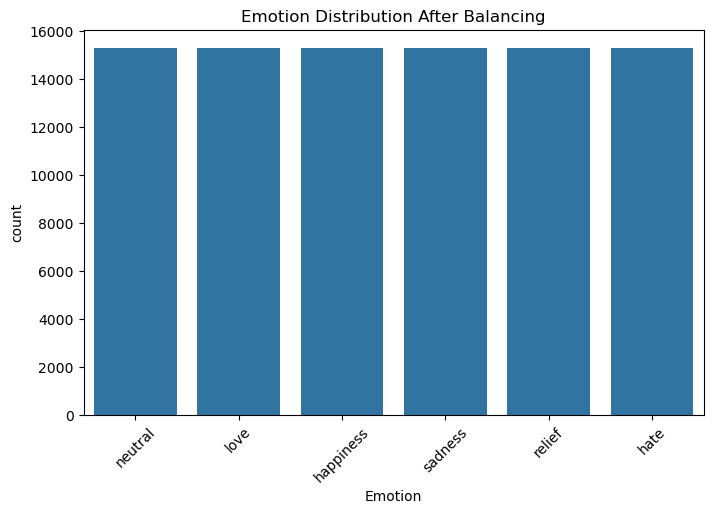

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_balanced, x="Emotion", order=top_emotions)
plt.title("Emotion Distribution After Balancing")
plt.xticks(rotation=45)
plt.show()


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["clean_text"], df_balanced["Emotion"], 
    test_size=0.2, stratify=df_balanced["Emotion"], random_state=42
)


In [23]:
vectorizer = TfidfVectorizer(max_features=2500, ngram_range=(1,1))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [24]:
model = RandomForestClassifier(n_estimators=60, max_depth=12, random_state=42)
model.fit(X_train_vec, y_train)


RandomForestClassifier(max_depth=12, n_estimators=60, random_state=42)

In [25]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.964794498116915

Classification Report:
               precision    recall  f1-score   support

   happiness       0.98      0.96      0.97      3053
        hate       0.99      0.98      0.99      3053
        love       0.99      0.97      0.98      3054
     neutral       0.88      0.97      0.92      3054
      relief       0.96      0.95      0.95      3054
     sadness       1.00      0.95      0.98      3053

    accuracy                           0.96     18321
   macro avg       0.97      0.96      0.97     18321
weighted avg       0.97      0.96      0.97     18321



In [ ]:
def predict_emotion(user_input):
    user_input_clean = clean_text(user_input)
    user_vec = vectorizer.transform([user_input_clean])
    return model.predict(user_vec)[0]

# Run predictions in a loop
while True:
    user_input = input("Enter a sentence (or '1' to stop): ").strip()
    if user_input.lower() == "1":
        break
    print(f"Predicted Emotion: {predict_emotion(user_input)}\n")


Enter a sentence (or '1' to stop):  i am happy today


Predicted Emotion: happiness



Enter a sentence (or '1' to stop):  i am going to market today


Predicted Emotion: neutral



Enter a sentence (or '1' to stop):  i am in love


Predicted Emotion: love

